# PyTorch Workflow


1. data (Prepare and load)
2. build model
3. fitting the model to the data (training)
4. making prediction and evaluating model (inference)
5. saving and loading a model
6. putting it all together


In [71]:
import torch
from torch import nn # nn contains all the pytorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

## 1. Data (Preparing and Loading)

In [72]:
# linear regression to create some data

weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [73]:
# Splitting data training and testing data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
    """
    Plots training data, test data, and optionally predictions.
    
    Args:
    - train_data: Training data (X_train).
    - train_labels: Labels corresponding to train_data (y_train).
    - test_data: Testing data (X_test).
    - test_labels: Labels corresponding to test_data (y_test).
    - predictions: Optional. Model predictions on the test_data.
    """
    plt.figure(figsize=(10, 7))
    
    # Plot training data
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    
    # Plot testing data
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    # Plot predictions if provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    # Add legend
    plt.legend(prop={"size": 14})
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Training, Testing Data and Predictions")
    plt.show()


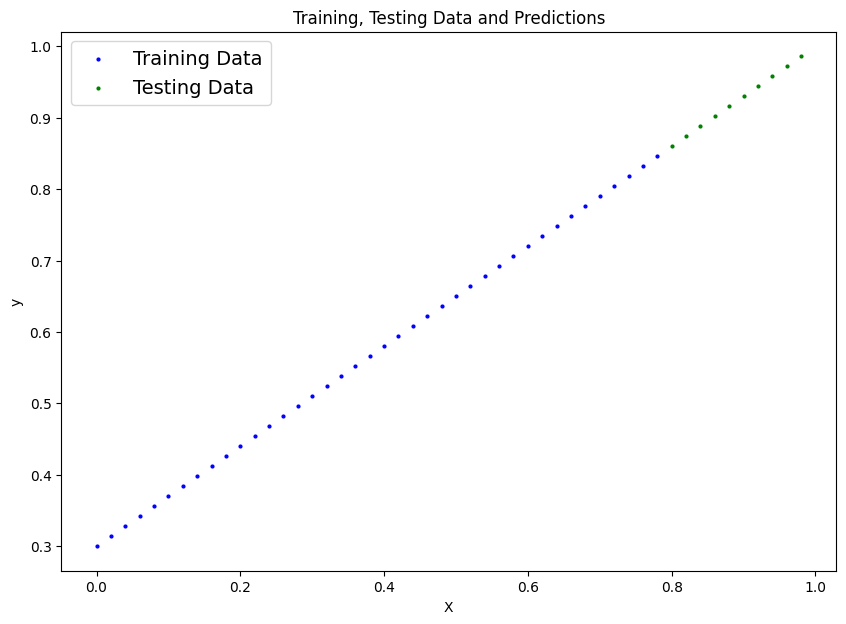

In [75]:
X_train_np = X_train.tolist()
y_train_np = y_train.tolist()
X_test_np = X_test.tolist()
y_test_np = y_test.tolist()

# Fake predictions for testing
# predictions = y_test_np + 0.05  # Add small offset as dummy predictions

# Call the function
plot_predictions(train_data=X_train_np,
                 train_labels=y_train_np,
                 test_data=X_test_np,
                 test_labels=y_test_np,)

## 2. Build Pytorch Model

In [76]:
# Create LinearRegression Model Class

class LinearRegressionModel(nn.Module):# <-nn.Module is like lego building bricks for pytorch model
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    
    # Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias # this is the linear regression formula 





In [77]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [78]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using 'torch.inference_mode()'

In [79]:
# Make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)
 
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

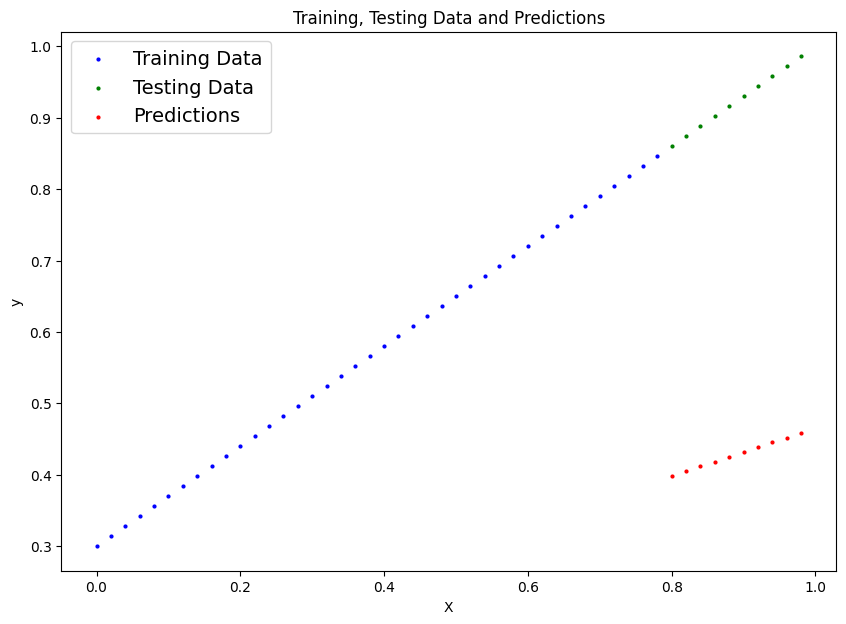

In [80]:
X_train_np = X_train.tolist()
y_train_np = y_train.tolist()
X_test_np = X_test.tolist()
y_test_np = y_test.tolist()

# Fake predictions for testing
# predictions = y_test_np + 0.05  # Add small offset as dummy predictions

# Call the function
plot_predictions(train_data=X_train_np,
                 train_labels=y_train_np,
                test_data=X_test_np,
                 test_labels=y_test_np,
                 predictions=y_preds.tolist())

## 3. Train Model
Things we need to train:
* Loss Function - Measures how wrong our model's predictions are to the ideal output
* Optimizer - Takes into account the loss and adjust the parameters accordingly

In [81]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [82]:
# Check out our model's parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [83]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # learning rate = hyperparameter which we set

### Building a training loop in pytorch

In [ ]:
# An epoch is one iteration of complete data
torch.manual_seed(42)

epochs = 200

epoch_count = []
test_loss_values = []
loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in pytorch set grad = True

    # 1. Forward Pass
    y_preds = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_preds,y_train)
    # print(f"Loss: {loss}")

    # 3. Optimizer Zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer(perfomr gradient descent)
    optimizer.step() 

    ### Testing
    model_0.eval() # turns off different settings in model which are not reqired for evaluation
    with torch.inference_mode(): # turns off gradient tracking
        # 1. Do the foward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test) 
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

Text(0.5, 0, 'Epochs')

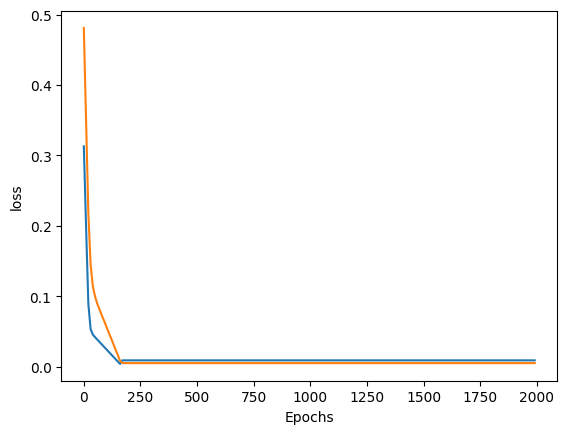

In [95]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(test_loss_values), label="Test loss")
plt.ylabel("loss")
plt.xlabel("Epochs")

In [85]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

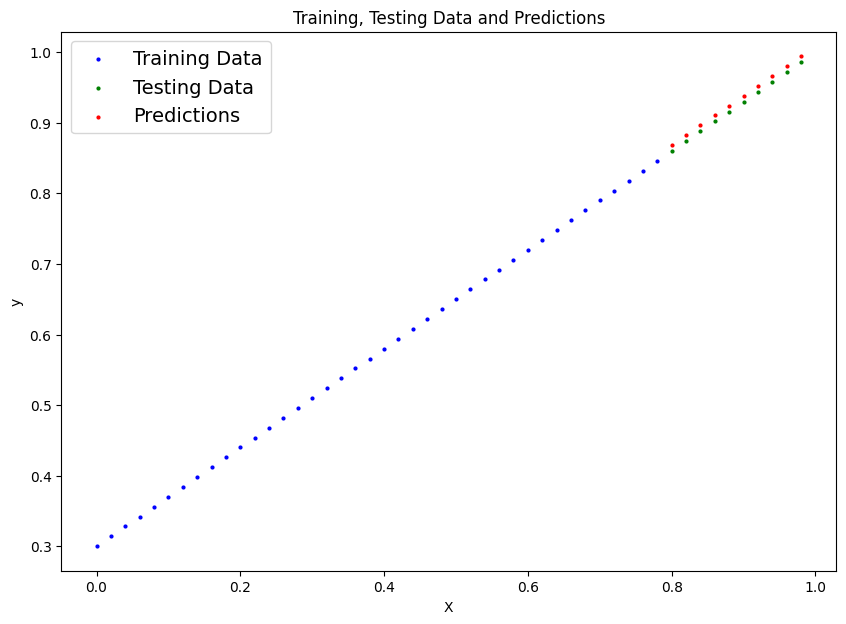

In [86]:
X_train_np = X_train.tolist()
y_train_np = y_train.tolist()
X_test_np = X_test.tolist()
y_test_np = y_test.tolist()

# Fake predictions for testing
# predictions = y_test_np + 0.05  # Add small offset as dummy predictions

# Call the function
plot_predictions(train_data=X_train_np,
                 train_labels=y_train_np,
                test_data=X_test_np,
                 test_labels=y_test_np,
                 predictions=y_preds_new.tolist())

In [87]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [88]:
weight, bias

(0.7, 0.3)